In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix ,confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [4]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Types

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Standardization of Datase

In [8]:
from sklearn.preprocessing import StandardScaler
Xn = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','ca','thal','slope']]
scaler = StandardScaler()
X = scaler.fit_transform(Xn)
Y = df.target


In [9]:
No = Y.unique()
print("Unique",No)
Y_total = Y.count()
Y_true = Y.sum()

Y_false = Y_total - Y_true
print("Positive Value = ", Y_true,", i.e :",round((Y_true/Y_total)*100,2),"%")
print("False Value = ", Y_false,", i.e :",100-round((Y_true/Y_total)*100,2),"%")


Unique [1 0]
Positive Value =  165 , i.e : 54.46 %
False Value =  138 , i.e : 45.54 %


# Description of Dataset

In [10]:
print("Description of Dataset")
df.describe()

Description of Dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Train Test Split of the dataset

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)


In [ ]:
totalAccuracy = []
totalPrecision = []
totalRecall = []
totalFscore = []

# RANDOM FOREST CLASSIFIER
##  1. Trianing without tunning of parameters 


In [9]:
model_RFC = RandomForestClassifier(criterion='entropy')

model_RFC.fit(X_train,Y_train)
Y_pred = model_RFC.predict(X_test)

accuracy_RF = model_RFC.score(X_test,Y_test)
precisionRF = precision_score(Y_test,Y_pred)
recallRF = recall_score(Y_test,Y_pred)
fScoreRF = f1_score(Y_test,Y_pred)

print('Accuracy: ',accuracy_RF*100)
print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))

Accuracy:  92.99719887955182
Precsion:  92.66
Recall:  93.18
F Score:  92.92


## 2. Hypertuning of RandonForestClassifier

In [15]:
model = RandomForestClassifier(criterion='gini')
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % ((grid_result.best_score_)*100, grid_result.best_params_))

Best: 90.358577 using {'max_features': 'sqrt', 'n_estimators': 100}


## 3. Training and Testing Model

In [18]:
model_RFC = RandomForestClassifier(n_estimators=100,max_features='sqrt',criterion='gini',n_jobs=-1)

model_RFC.fit(X_train,Y_train)
accuracy_RF = model_RFC.score(X_test,Y_test)

print('Accuracy: ',accuracy_RF*100)
Y_pred = model_RFC.predict(X_test)

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionRF = precision_score(Y_test,Y_pred)
recallRF = recall_score(Y_test,Y_pred)
fScoreRF = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_RF)
totalPrecision.append(precisionRF)
totalRecall.append(recallRF)
totalFscore.append(fScoreRF)

print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))

print("Confusion Matrix: \n",conMatrix)


Accuracy:  93.8375350140056
Precsion:  93.75
Recall:  93.75
F Score:  93.75
Confusion Matrix: 
 [[170  11]
 [ 11 165]]


Accuracy:  93.8375350140056
Precsion:  93.75
Recall:  93.75
F Score:  93.75


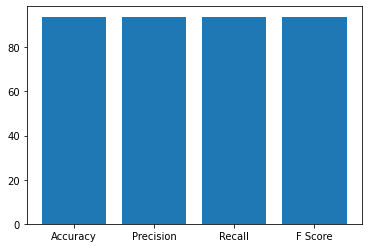

In [20]:
print('Accuracy: ',accuracy_RF*100)
print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))
y_label = [accuracy_RF*100, precisionRF*100,recallRF*100,fScoreRF*100]
x_label = ['Accuracy','Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

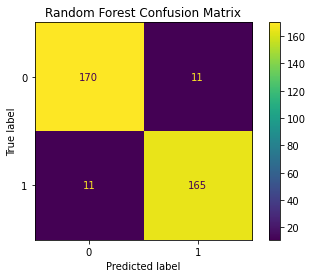

In [22]:
plot_confusion_matrix(model_RFC, X_test, Y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# K-Nearest Neighbors
## 1. Training without tunning of parameters

In [23]:

model_KNN = KNeighborsClassifier()

model_KNN.fit(X_train,Y_train)
accuracy_KNN = model_KNN.score(X_test,Y_test)
print('Accuracy: ',accuracy_KNN*100,"\n")
Y_pred = model_KNN.predict(X_test)


precisionKNN = precision_score(Y_test,Y_pred)
recallKNN = recall_score(Y_test,Y_pred)
fScoreKNN = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionKNN*100,2))
print("Recall: ",round(recallKNN*100,2))
print("F Score: ",round(fScoreKNN*100,2))


Accuracy:  85.43417366946778 

Precsion:  82.63
Recall:  89.2
F Score:  85.79


## 2. Hyperparameter tuning of K-Nearsest Neighbor

In [24]:
model = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.914788 using {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


## 3. Training and Testing Model

In [40]:

model_KNN = KNeighborsClassifier(metric='manhattan',n_neighbors=11,weights='distance',n_jobs=-1)

model_KNN.fit(X_train,Y_train)
accuracy_KNN = model_KNN.score(X_test,Y_test)
print('Accuracy: ',accuracy_KNN*100,"\n")
Y_pred = model_KNN.predict(X_test)

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionKNN = precision_score(Y_test,Y_pred)
recallKNN = recall_score(Y_test,Y_pred)
fScoreKNN = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_KNN)
totalPrecision.append(precisionKNN)
totalRecall.append(recallKNN)
totalFscore.append(fScoreKNN)

print("Precsion: ",round(precisionKNN*100,2))
print("Recall: ",round(recallKNN*100,2))
print("F Score: ",round(fScoreKNN*100,2))

print("Confusion Matrix: \n",conMatrix)

Accuracy:  92.43697478991596 

Precsion:  91.16
Recall:  93.75
F Score:  92.44
Confusion Matrix: 
 [[165  16]
 [ 11 165]]


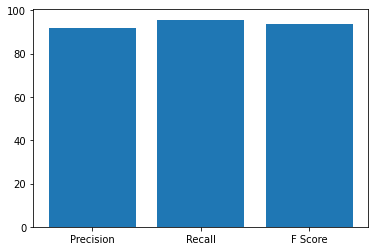

In [86]:

y_label = [precisionKNN*100,recallKNN*100,fScoreKNN*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

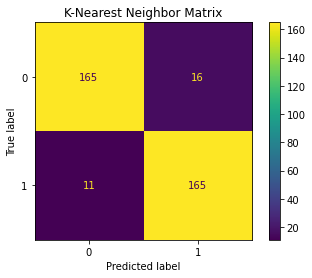

In [44]:

plot_confusion_matrix(model_KNN, X_test, Y_test)
plt.title("K-Nearest Neighbor Matrix")
plt.show()

# Naive Bayes
## 1. Training without tuning of parameters

In [29]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, Y_train)

Y_pred = model_GNB.predict(X_test)
accuracy_GNB = model_GNB.score(X_test,Y_test)
print('Accuracy: ',accuracy_GNB*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGNB = precision_score(Y_test,Y_pred)
recallGNB = recall_score(Y_test,Y_pred)
fScoreGNB = f1_score(Y_test,Y_pred)


print("Precsion: ",round(precisionGNB*100,2))
print("Recall: ",round(recallGNB*100,2))
print("F Score: ",round(fScoreGNB*100,2))

Accuracy:  85.43417366946778 

Precsion:  85.23
Recall:  85.23
F Score:  85.23


## 2. Hypertuning of Gaussian Naive Bayes

In [30]:

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     verbose=1, 
                     cv=cv,
                     scoring='accuracy')


gs_NB.fit(X_train,Y_train)
print("Best: %f using %s" % (gs_NB.best_score_, gs_NB.best_params_))

Fitting 40 folds for each of 100 candidates, totalling 4000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.831056 using {'var_smoothing': 0.2848035868435802}
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   11.1s finished


## 3. Training and Testing Model

In [31]:

model_GNB = GaussianNB(var_smoothing=0.2848035868435802)
model_GNB.fit(X_train, Y_train)

Y_pred = model_GNB.predict(X_test)
accuracy_GNB = model_GNB.score(X_test,Y_test)
print('Accuracy: ',accuracy_GNB*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGNB = precision_score(Y_test,Y_pred)
recallGNB = recall_score(Y_test,Y_pred)
fScoreGNB = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_GNB)
totalPrecision.append(precisionGNB)
totalRecall.append(recallGNB)
totalFscore.append(fScoreGNB)

print("Precsion: ",round(precisionGNB*100,2))
print("Recall: ",round(recallGNB*100,2))
print("F Score: ",round(fScoreGNB*100,2))

print("Confusion Matrix: \n",conMatrix)

Accuracy:  85.15406162464986 

Precsion:  85.14
Recall:  84.66
F Score:  84.9
Confusion Matrix: 
 [[155  26]
 [ 27 149]]


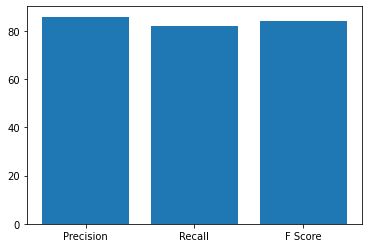

In [90]:
y_label = [precisionGNB*100,recallGNB*100,fScoreGNB*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

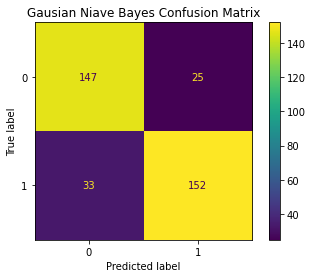

In [91]:
plot_confusion_matrix(model_GNB, X_test, Y_test)
plt.title("Gausian Niave Bayes Confusion Matrix")
plt.show()

# Decision Tree
## 1. Training without tuning of parameters

In [32]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)

Y_pred = model_DTC.predict(X_test)
accuracy_DTC = model_DTC.score(X_test,Y_test)
print('Accuracy: ',accuracy_DTC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionDTC = precision_score(Y_test,Y_pred)
recallDTC = recall_score(Y_test,Y_pred)
fScoreDTC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionDTC*100,2))
print("Recall: ",round(recallDTC*100,2))
print("F Score: ",round(fScoreDTC*100,2))

Accuracy:  87.11484593837535 

Precsion:  87.79
Recall:  85.8
F Score:  86.78


## 2. Hyperparameter tuning of Decision Tree

In [33]:
df_classifier = DecisionTreeClassifier()

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3,4,5,6]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train,Y_train)
# df_classifier.score(X_test,Y_test)
print("Best: %f using %s" % (gs_DT.best_score_, gs_DT.best_params_))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.857157 using {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.2s finished


## 3. Training and Testing of Model

In [35]:

model_DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=2)
model_DTC.fit(X_train, Y_train)

Y_pred = model_DTC.predict(X_test)
accuracy_DTC = model_DTC.score(X_test,Y_test)
print('Accuracy: ',accuracy_DTC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionDTC = precision_score(Y_test,Y_pred)
recallDTC = recall_score(Y_test,Y_pred)
fScoreDTC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionDTC*100,2))
print("Recall: ",round(recallDTC*100,2))
print("F Score: ",round(fScoreDTC*100,2))

totalAccuracy.append(accuracy_DTC)
totalPrecision.append(precisionDTC)
totalRecall.append(recallDTC)
totalFscore.append(fScoreDTC)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  89.35574229691878 

Precsion:  86.32
Recall:  93.18
F Score:  89.62
Confusion Matrix: 
 [[155  26]
 [ 12 164]]


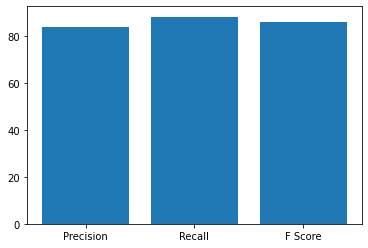

In [94]:

y_label = [precisionDTC*100,recallDTC*100,fScoreDTC*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

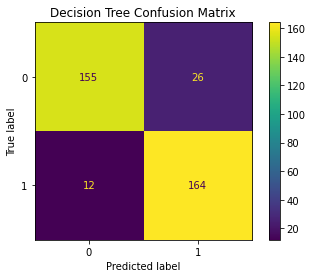

In [36]:
plot_confusion_matrix(model_DTC, X_test, Y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Logistic Regression
## 1. Training wihtout tuning of parameters

In [37]:

model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

Y_pred = model_LR.predict(X_test)
accuracy_LR = model_LR.score(X_test,Y_test)
print('Accuracy: ',accuracy_LR*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionLR = precision_score(Y_test,Y_pred)
recallLR = recall_score(Y_test,Y_pred)
fScoreLR = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionLR*100,2))
print("Recall: ",round(recallLR*100,2))
print("F Score: ",round(fScoreLR*100,2))

Accuracy:  83.19327731092437 

Precsion:  81.18
Recall:  85.8
F Score:  83.43


## 2. Hyperparameter tuning of the model

In [96]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.826604 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


## 3. Training and Testing of the Model

In [38]:

model_LR = LogisticRegression(C=0.1,penalty='l2',solver='liblinear')
model_LR.fit(X_train, Y_train)

Y_pred = model_LR.predict(X_test)
accuracy_LR = model_LR.score(X_test,Y_test)
print('Accuracy: ',accuracy_LR*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionLR = precision_score(Y_test,Y_pred)
recallLR = recall_score(Y_test,Y_pred)
fScoreLR = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionLR*100,2))
print("Recall: ",round(recallLR*100,2))
print("F Score: ",round(fScoreLR*100,2))


totalAccuracy.append(accuracy_LR)
totalPrecision.append(precisionLR)
totalRecall.append(recallLR)
totalFscore.append(fScoreLR)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  82.6330532212885 

Precsion:  80.98
Recall:  84.66
F Score:  82.78
Confusion Matrix: 
 [[146  35]
 [ 27 149]]


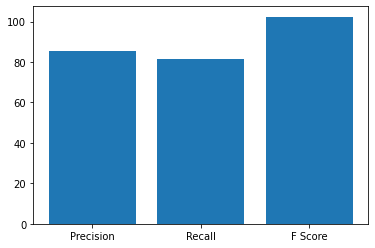

In [100]:
y_label = [precisionLR*100,recallLR*100,fScoreLR*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

## 4. Confusion Matrix

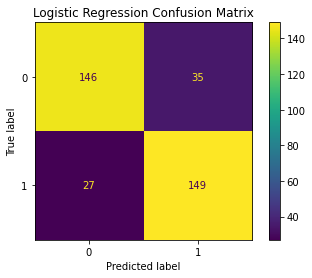

In [39]:
plot_confusion_matrix(model_LR, X_test, Y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [13]:
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.880771 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [14]:
model_SVC = SVC(C=10,gamma='scale',kernel='rbf')
model_SVC.fit(X_train,Y_train)

Y_pred = model_SVC.predict(X_test)

accuracy_SVC = model_SVC.score(X_test,Y_test)
print('Accuracy: ',accuracy_SVC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionSVC = precision_score(Y_test,Y_pred)
recallSVC = recall_score(Y_test,Y_pred)
fScoreSVC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionSVC*100,2))
print("Recall: ",round(recallSVC*100,2))
print("F Score: ",round(fScoreSVC*100,2))

totalAccuracy.append(accuracy_SVC)
totalPrecision.append(precisionSVC)
totalRecall.append(recallSVC)
totalFscore.append(fScoreSVC)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  86.83473389355743 

Precsion:  87.05
Recall:  88.42
F Score:  87.73
Confusion Matrix: 
 [[142  25]
 [ 22 168]]


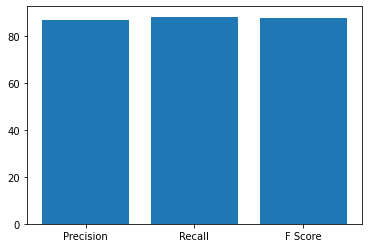

In [16]:
y_label = [precisionSVC*100,recallSVC*100,fScoreSVC*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

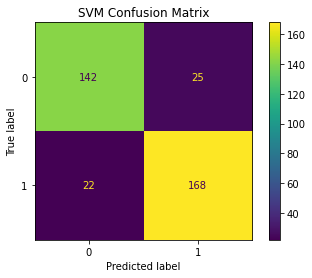

In [18]:
plot_confusion_matrix(model_SVC, X_test, Y_test)
plt.title("SVM Confusion Matrix")
plt.show()

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Accuracy:  89.07563025210085 

Precsion:  88.72
Recall:  91.05
F Score:  89.87
Confusion Matrix: 
 [[145  22]
 [ 17 173]]


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train,Y_train)

Y_pred = model_GBC.predict(X_test)
print('Accuracy: ',model_GBC.score(X_test,Y_test)*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGBC = precision_score(Y_test,Y_pred)
recallGBC = recall_score(Y_test,Y_pred)
fScoreGBC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionGBC*100,2))
print("Recall: ",round(recallGBC*100,2))
print("F Score: ",round(fScoreGBC*100,2))

print("Confusion Matrix: \n",conMatrix)

Best: 0.898824 using {'n_estimators': 1000}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train,Y_train)

Y_pred = model_GBC.predict(X_test)
accuracy_GBC = model_GBC.score(X_test,Y_test)
print('Accuracy: ',accuracy_GBC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGBC = precision_score(Y_test,Y_pred)
recallGBC = recall_score(Y_test,Y_pred)
fScoreGBC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionGBC*100,2))
print("Recall: ",round(recallGBC*100,2))
print("F Score: ",round(fScoreGBC*100,2))

totalAccuracy.append(accuracy_GBC)
totalPrecision.append(precisionGBC)
totalRecall.append(recallGBC)
totalFscore.append(fScoreGBC)

print("Confusion Matrix: \n",conMatrix)